In [1]:
import sys
sys.path.insert(0, "../../python")

from propagation import plasma
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os

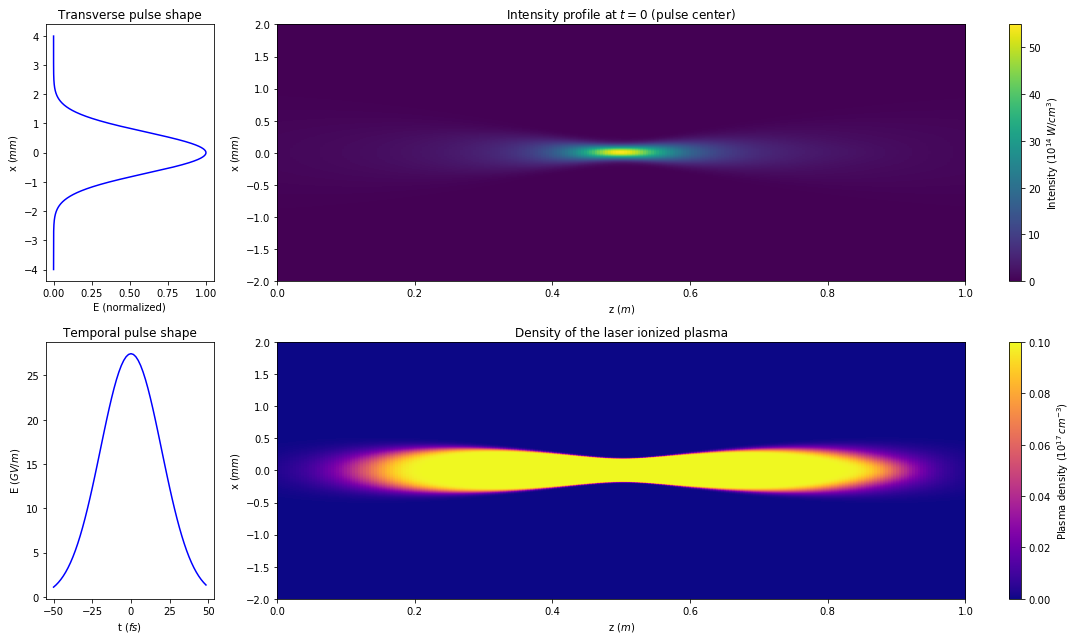

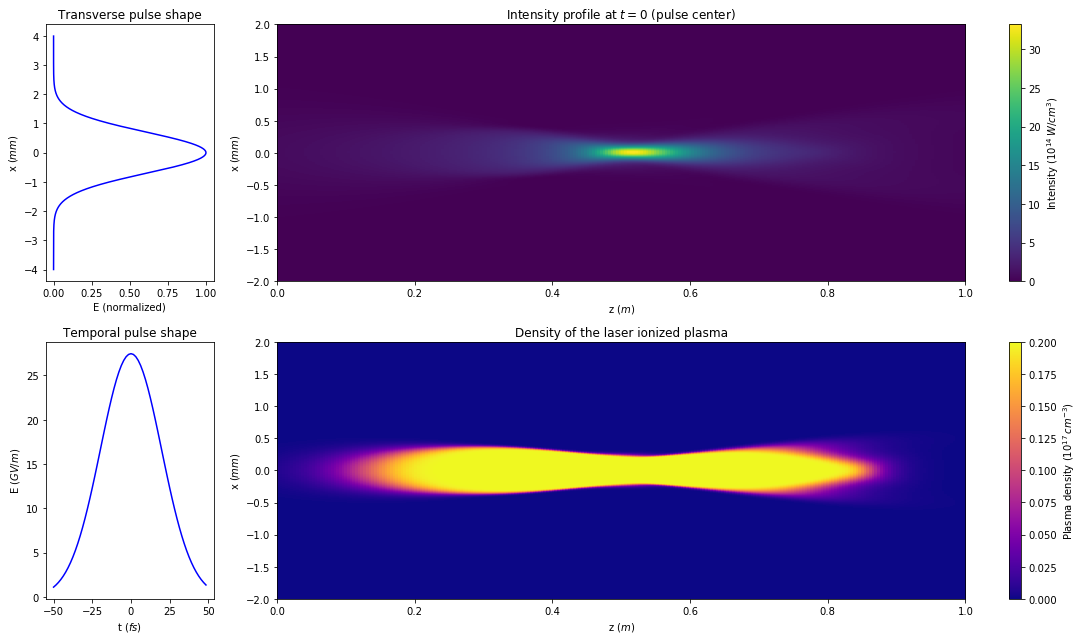

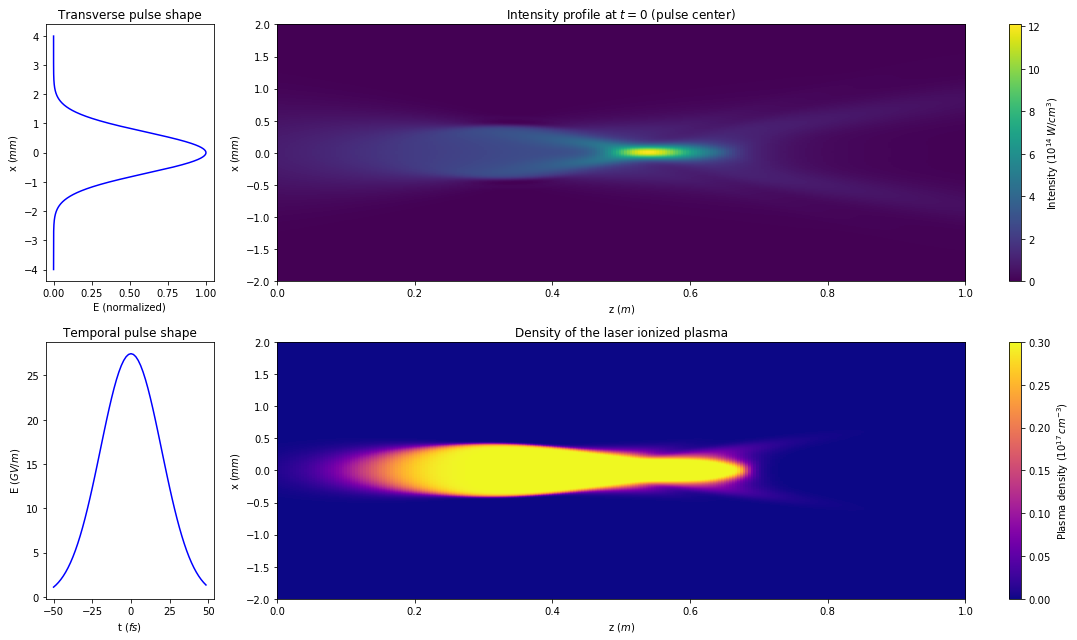

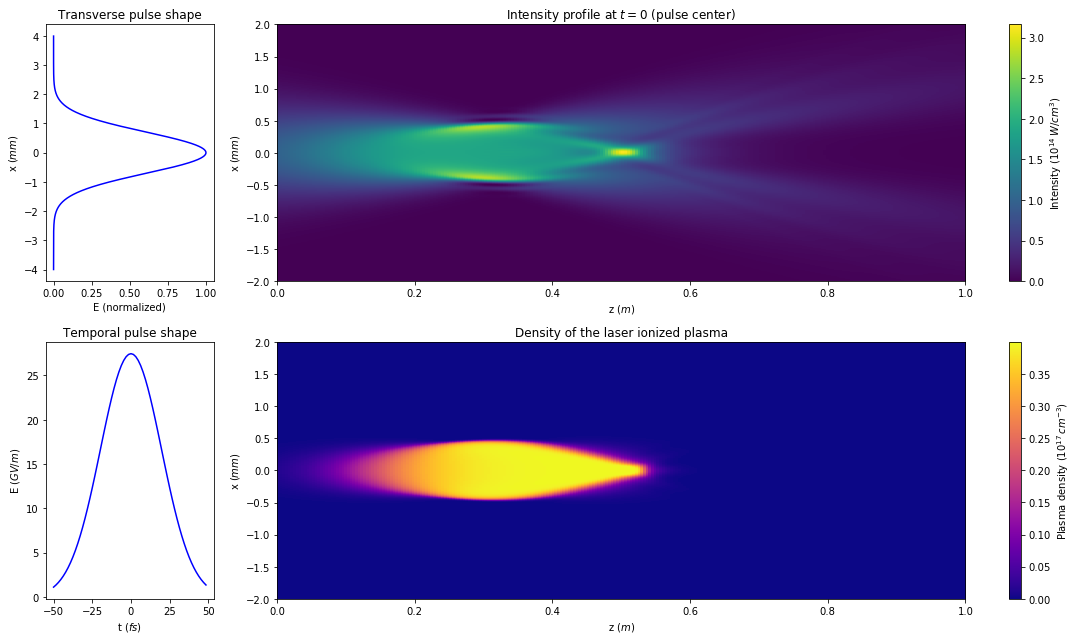

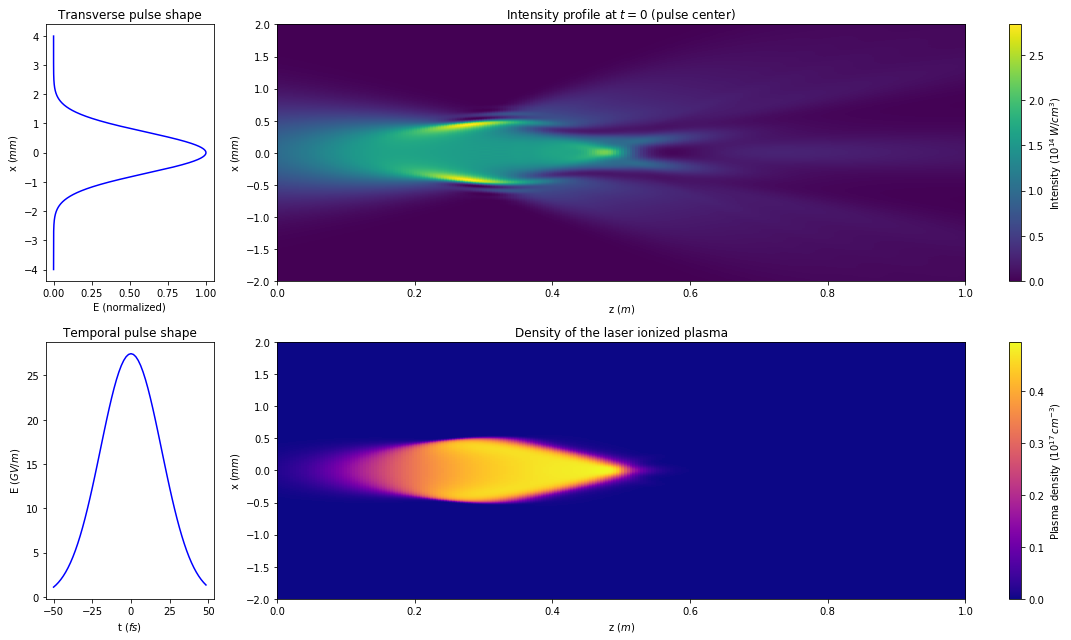

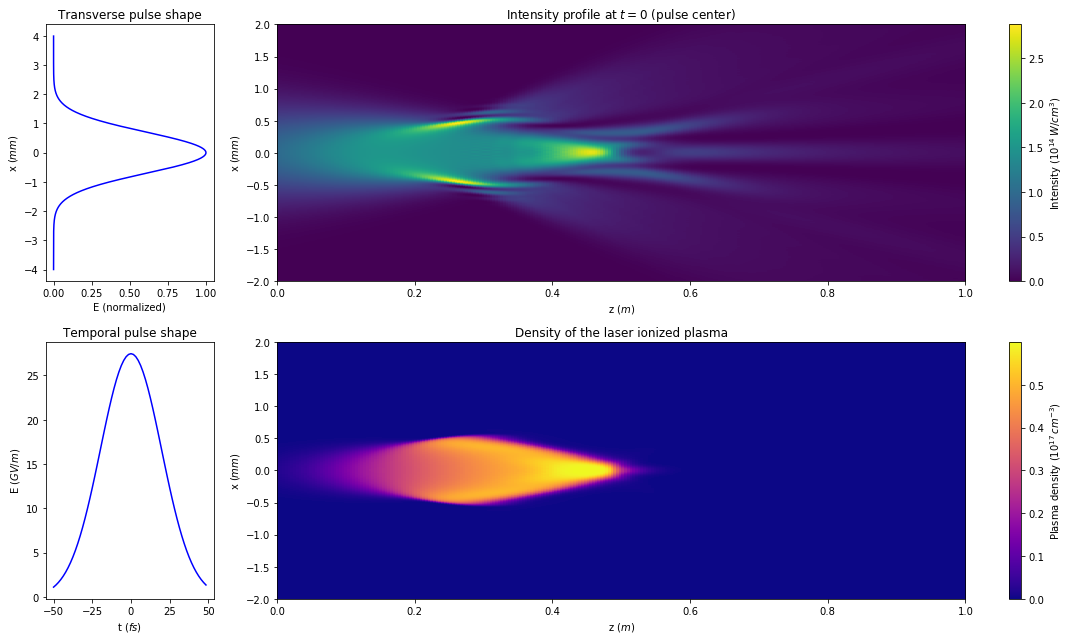

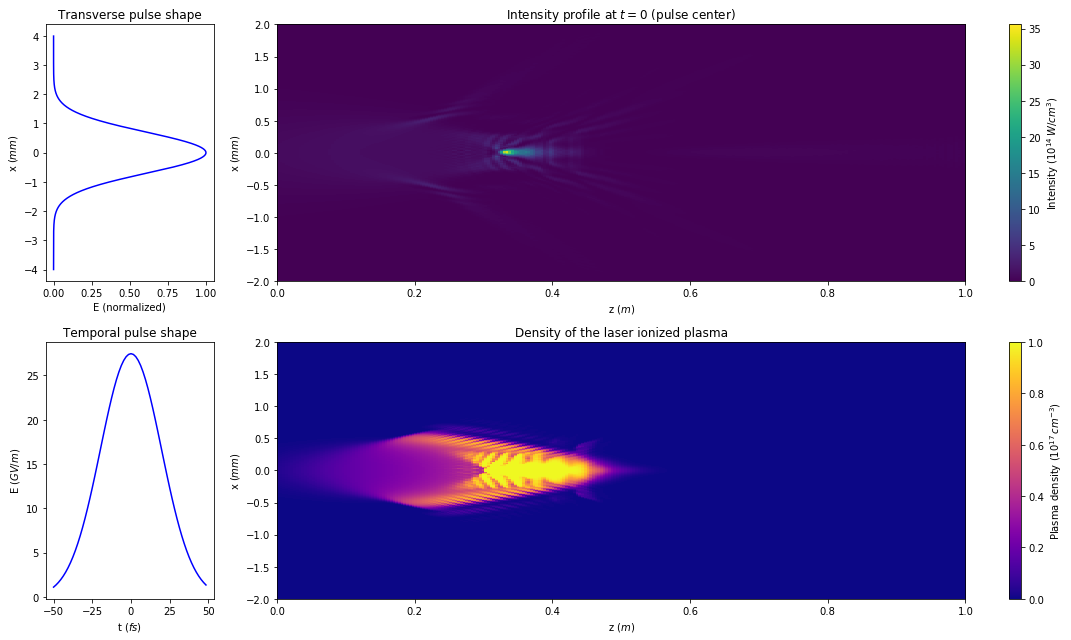

In [3]:
# Initial electric field
def Efunc(x, y):
    # Input Gaussian beam
    w0 = 1e3
    r2 = x**2 + y**2
    E0 = np.exp(-r2 / w0**2)
    # Spherical lens
    f = 0.5e6
    T0 = np.exp(-1j*np.pi*r2/(0.8*f))
    # Initial electric field
    return E0 * T0

# Temporal pulse
def Tfunc(t):
    from ionization import ionization
    tau = 35
    return ionization.gaussian_envelope(1.0, t, tau).real

# Setup the parameters
params = {'Nx' : 2**10,
          'Ny' : 2**8,
          'Nz' : 2**8,
          'Nt' : 2**6,
          'X' : 8000,
          'Y' : 8000,
          'Z' : 1e6,
          'T' : 100,
          'n0' : 1.0,
          'alpha' : 0.667,
          'EI' : 13.5984,
          'lam' : 0.8
          }

path = 'C:/Users/robert/Documents/Research/Data/Spherical_Lens_Refraction/'

n0 = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0]
for i in range(0, 7):
    params['n0'] = n0[i]
    directory = 'intensity-1.0_density-' + str(params['n0'])
    params['path'] = path + directory+'/'
    # Create the directory if it doesn't exist
    if not os.path.exists(params['path']):
        os.makedirs(params['path'])
    # Run the simulation      
    #plasma.plasma_refraction(params, Efunc, Tfunc)
    # Create the summary
    plasma.summary_plot(params['path'])